In [1]:
#Imports for M-LOOP
# import mloop.interfaces as mli
# import mloop.controllers as mlc
# import mloop.visualizations as mlv

#Other imports
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import trange
# import time

from functions import*
from Mloop_and_simcim import*

datatype = torch.float32
device = 'cuda'

W0225 15:28:25.384220 31568 deprecation.py:323] From C:\dev\Anaconda3\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:65: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


I0225 15:28:27.072983 31568 utilities.py:86] MLOOP Logger configured.
I0225 15:28:27.073981 31568 interfaces.py:82] Creating interface.
I0225 15:28:27.075975 31568 controllers.py:213] Controller init completed.
I0225 15:28:27.076973 31568 learners.py:167] Learner init completed.
I0225 15:28:27.078967 31568 learners.py:167] Learner init completed.


INFO     Optimization started.


I0225 15:28:27.079966 31568 controllers.py:333] Optimization started.
I0225 15:28:27.081960  1432 interfaces.py:98] Entering main loop of interface.
I0225 15:28:27.081960 31568 controllers.py:660] ML learner started.
I0225 15:28:27.168239 31568 controllers.py:668] Starting training optimization.


INFO     Run:1 (training)


I0225 15:28:27.169237 31568 controllers.py:669] Run:1 (training)


INFO     params [0.48177511 0.56208605 0.38540748 3.09171694]


I0225 15:28:27.171231 31568 controllers.py:256] params [0.48177511 0.56208605 0.38540748 3.09171694]


INFO     cost -20340.53515625 +/- 0.0


I0225 15:28:31.058901 31568 controllers.py:303] cost -20340.53515625 +/- 0.0


INFO     Run:2 (training)


I0225 15:28:31.060852 31568 controllers.py:676] Run:2 (training)


INFO     params [ 2.92290515  0.49038253 -1.36459207  6.85488248]


I0225 15:28:31.062847 31568 controllers.py:256] params [ 2.92290515  0.49038253 -1.36459207  6.85488248]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:28:34.656089 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:3 (training)


I0225 15:28:34.657086 31568 controllers.py:676] Run:3 (training)


INFO     params [1.14333854 0.13464285 0.72310177 4.6044385 ]


I0225 15:28:34.659081 31568 controllers.py:256] params [1.14333854 0.13464285 0.72310177 4.6044385 ]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:28:38.143123 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:4 (training)


I0225 15:28:38.144121 31568 controllers.py:676] Run:4 (training)


INFO     params [2.96179765 2.92690965 1.97977769 0.19055148]


I0225 15:28:38.147114 31568 controllers.py:256] params [2.96179765 2.92690965 1.97977769 0.19055148]


INFO     cost -20340.900390625 +/- 0.0


I0225 15:28:41.614944 31568 controllers.py:303] cost -20340.900390625 +/- 0.0


INFO     Run:5 (training)


I0225 15:28:41.615913 31568 controllers.py:676] Run:5 (training)


INFO     params [ 0.27866035  2.61268035 -0.93413943  6.7889806 ]


I0225 15:28:41.618904 31568 controllers.py:256] params [ 0.27866035  2.61268035 -0.93413943  6.7889806 ]


INFO     cost -20340.5390625 +/- 0.0


I0225 15:28:45.085459 31568 controllers.py:303] cost -20340.5390625 +/- 0.0


INFO     Run:6 (training)


I0225 15:28:45.086450 31568 controllers.py:676] Run:6 (training)


INFO     params [0.83564597 1.75988701 1.93018833 3.24347131]


I0225 15:28:45.088445 31568 controllers.py:256] params [0.83564597 1.75988701 1.93018833 3.24347131]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:28:48.528051 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:7 (training)


I0225 15:28:48.529021 31568 controllers.py:676] Run:7 (training)


INFO     params [ 1.86771682  0.5641719  -0.43240122  3.83612035]


I0225 15:28:48.531015 31568 controllers.py:256] params [ 1.86771682  0.5641719  -0.43240122  3.83612035]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:28:51.949731 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:8 (training)


I0225 15:28:51.950728 31568 controllers.py:676] Run:8 (training)


INFO     params [0.5873777  1.61898573 1.35948464 9.12567762]


I0225 15:28:51.952732 31568 controllers.py:256] params [0.5873777  1.61898573 1.35948464 9.12567762]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:28:55.440648 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:9 (training)


I0225 15:28:55.441646 31568 controllers.py:676] Run:9 (training)


INFO     params [1.65725531 2.47731302 0.02090418 5.17997078]


I0225 15:28:55.443640 31568 controllers.py:256] params [1.65725531 2.47731302 0.02090418 5.17997078]


INFO     cost -20334.8046875 +/- 0.0


I0225 15:28:58.880845 31568 controllers.py:303] cost -20334.8046875 +/- 0.0


INFO     Run:10 (training)


I0225 15:28:58.881812 31568 controllers.py:676] Run:10 (training)


INFO     params [ 0.54348339  2.48837229 -0.74030231  0.6592232 ]


I0225 15:28:58.883805 31568 controllers.py:256] params [ 0.54348339  2.48837229 -0.74030231  0.6592232 ]


INFO     cost -20330.904296875 +/- 0.0


I0225 15:29:02.355702 31568 controllers.py:303] cost -20330.904296875 +/- 0.0


INFO     Run:11 (training)


I0225 15:29:02.356685 31568 controllers.py:684] Run:11 (training)


INFO     params [1.22832737 1.42431442 1.27606874 7.43970046]


I0225 15:29:02.359679 31568 controllers.py:256] params [1.22832737 1.42431442 1.27606874 7.43970046]
I0225 15:29:02.362668 31568 controllers.py:688] Starting ML optimization.


INFO     cost -20325.21484375 +/- 0.0


I0225 15:29:05.767883 31568 controllers.py:303] cost -20325.21484375 +/- 0.0
I0225 15:29:05.771854 31568 controllers.py:694] End training runs.


INFO     Run:12 (trainer)


I0225 15:29:05.772839 31568 controllers.py:702] Run:12 (trainer)


INFO     params [0.99132181 0.82997226 1.29918468 9.59199403]


I0225 15:29:05.775832 31568 controllers.py:256] params [0.99132181 0.82997226 1.29918468 9.59199403]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:29:09.508848 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:13 (machine learner)


I0225 15:29:09.509813 31568 controllers.py:707] Run:13 (machine learner)


INFO     params [ 0.          0.         -1.25157289  0.        ]


I0225 15:29:09.511806 31568 controllers.py:256] params [ 0.          0.         -1.25157289  0.        ]


INFO     cost -2600.338623046875 +/- 0.0


I0225 15:29:12.923850 31568 controllers.py:303] cost -2600.338623046875 +/- 0.0


INFO     Run:14 (machine learner)


I0225 15:29:12.924815 31568 controllers.py:707] Run:14 (machine learner)


INFO     params [ 0.          0.         -1.00902709  0.84344801]


I0225 15:29:12.926875 31568 controllers.py:256] params [ 0.          0.         -1.00902709  0.84344801]


INFO     cost -20330.03515625 +/- 0.0


I0225 15:29:16.390628 31568 controllers.py:303] cost -20330.03515625 +/- 0.0


INFO     Run:15 (machine learner)


I0225 15:29:16.391626 31568 controllers.py:707] Run:15 (machine learner)


INFO     params [ 0.28459841  0.         -1.95269048  0.        ]


I0225 15:29:16.393634 31568 controllers.py:256] params [ 0.28459841  0.         -1.95269048  0.        ]


INFO     cost -3262.792236328125 +/- 0.0


I0225 15:29:19.833772 31568 controllers.py:303] cost -3262.792236328125 +/- 0.0


INFO     Run:16 (trainer)


I0225 15:29:19.835766 31568 controllers.py:702] Run:16 (trainer)


INFO     params [ 1.56632724  2.40426331 -1.83645405  4.76067861]


I0225 15:29:19.838770 31568 controllers.py:256] params [ 1.56632724  2.40426331 -1.83645405  4.76067861]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:29:23.371999 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:17 (machine learner)


I0225 15:29:23.373964 31568 controllers.py:707] Run:17 (machine learner)


INFO     params [ 2.60710547  3.          2.         10.        ]


I0225 15:29:23.375959 31568 controllers.py:256] params [ 2.60710547  3.          2.         10.        ]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:29:26.796733 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:18 (machine learner)


I0225 15:29:26.797722 31568 controllers.py:707] Run:18 (machine learner)


INFO     params [ 0.41728604  3.         -0.21805611  8.68244328]


I0225 15:29:26.799715 31568 controllers.py:256] params [ 0.41728604  3.         -0.21805611  8.68244328]


INFO     cost -20365.5625 +/- 0.0


I0225 15:29:30.253760 31568 controllers.py:303] cost -20365.5625 +/- 0.0


INFO     Run:19 (machine learner)


I0225 15:29:30.254757 31568 controllers.py:707] Run:19 (machine learner)


INFO     params [ 1.02631728  3.          0.9054344  10.        ]


I0225 15:29:30.256770 31568 controllers.py:256] params [ 1.02631728  3.          0.9054344  10.        ]


INFO     cost -20363.630859375 +/- 0.0


I0225 15:29:33.699889 31568 controllers.py:303] cost -20363.630859375 +/- 0.0


INFO     Run:20 (trainer)


I0225 15:29:33.700851 31568 controllers.py:702] Run:20 (trainer)


INFO     params [0.08865168 2.55758943 1.42347328 6.98474663]


I0225 15:29:33.702844 31568 controllers.py:256] params [0.08865168 2.55758943 1.42347328 6.98474663]


INFO     cost -20368.412109375 +/- 0.0


I0225 15:29:37.242192 31568 controllers.py:303] cost -20368.412109375 +/- 0.0


INFO     Run:21 (machine learner)


I0225 15:29:37.243190 31568 controllers.py:707] Run:21 (machine learner)


INFO     params [ 1.34908340e-04  3.00000000e+00 -1.94400000e+00  9.84753961e-01]


I0225 15:29:37.245185 31568 controllers.py:256] params [ 1.34908340e-04  3.00000000e+00 -1.94400000e+00  9.84753961e-01]


INFO     cost -20328.833984375 +/- 0.0


I0225 15:29:40.688780 31568 controllers.py:303] cost -20328.833984375 +/- 0.0


INFO     Run:22 (machine learner)


I0225 15:29:40.689778 31568 controllers.py:707] Run:22 (machine learner)


INFO     params [ 0.          1.96290383  0.28880715 10.        ]


I0225 15:29:40.690776 31568 controllers.py:256] params [ 0.          1.96290383  0.28880715 10.        ]


INFO     cost -20368.97265625 +/- 0.0


I0225 15:29:44.298041 31568 controllers.py:303] cost -20368.97265625 +/- 0.0


INFO     Run:23 (machine learner)


I0225 15:29:44.300033 31568 controllers.py:707] Run:23 (machine learner)


INFO     params [ 0.54855352  2.41177888 -2.          1.55212872]


I0225 15:29:44.302015 31568 controllers.py:256] params [ 0.54855352  2.41177888 -2.          1.55212872]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:29:47.929095 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:24 (trainer)


I0225 15:29:47.931060 31568 controllers.py:702] Run:24 (trainer)


INFO     params [1.65601661 1.13984662 1.16968203 4.83262586]


I0225 15:29:47.933053 31568 controllers.py:256] params [1.65601661 1.13984662 1.16968203 4.83262586]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:29:51.509587 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:25 (machine learner)


I0225 15:29:51.510616 31568 controllers.py:707] Run:25 (machine learner)


INFO     params [ 3.          0.         -1.1972797   2.21452547]


I0225 15:29:51.511584 31568 controllers.py:256] params [ 3.          0.         -1.1972797   2.21452547]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:29:55.091961 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:26 (machine learner)


I0225 15:29:55.092984 31568 controllers.py:707] Run:26 (machine learner)


INFO     params [ 0.          2.48851693  0.38663012 10.        ]


I0225 15:29:55.094949 31568 controllers.py:256] params [ 0.          2.48851693  0.38663012 10.        ]


INFO     cost -20368.802734375 +/- 0.0


I0225 15:29:58.679404 31568 controllers.py:303] cost -20368.802734375 +/- 0.0


INFO     Run:27 (machine learner)


I0225 15:29:58.681414 31568 controllers.py:707] Run:27 (machine learner)


INFO     params [2.24461023e-03 3.00000000e+00 8.33047665e-01 1.00000000e+01]


I0225 15:29:58.682396 31568 controllers.py:256] params [2.24461023e-03 3.00000000e+00 8.33047665e-01 1.00000000e+01]


INFO     cost -20368.89453125 +/- 0.0


I0225 15:30:02.210615 31568 controllers.py:303] cost -20368.89453125 +/- 0.0


INFO     Run:28 (trainer)


I0225 15:30:02.212860 31568 controllers.py:702] Run:28 (trainer)


INFO     params [1.84131888 2.50679882 1.75318968 2.02877005]


I0225 15:30:02.214862 31568 controllers.py:256] params [1.84131888 2.50679882 1.75318968 2.02877005]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:30:05.824242 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:29 (machine learner)


I0225 15:30:05.825280 31568 controllers.py:707] Run:29 (machine learner)


INFO     params [ 0.          0.         -1.97182506  5.90905094]


I0225 15:30:05.827233 31568 controllers.py:256] params [ 0.          0.         -1.97182506  5.90905094]


INFO     cost -20368.97265625 +/- 0.0


I0225 15:30:09.263639 31568 controllers.py:303] cost -20368.97265625 +/- 0.0


INFO     Run:30 (machine learner)


I0225 15:30:09.266597 31568 controllers.py:707] Run:30 (machine learner)


INFO     params [ 0.          0.         -0.10574612  0.        ]


I0225 15:30:09.267588 31568 controllers.py:256] params [ 0.          0.         -0.10574612  0.        ]


INFO     cost -3469.47509765625 +/- 0.0


I0225 15:30:12.771397 31568 controllers.py:303] cost -3469.47509765625 +/- 0.0


INFO     Run:31 (machine learner)


I0225 15:30:12.772394 31568 controllers.py:707] Run:31 (machine learner)


INFO     params [ 1.04112167  0.6770474  -2.          0.        ]


I0225 15:30:12.774327 31568 controllers.py:256] params [ 1.04112167  0.6770474  -2.          0.        ]


INFO     cost -2048.587646484375 +/- 0.0


I0225 15:30:16.314884 31568 controllers.py:303] cost -2048.587646484375 +/- 0.0


INFO     Run:32 (trainer)


I0225 15:30:16.315906 31568 controllers.py:702] Run:32 (trainer)


INFO     params [2.63308766 1.54829116 0.6667751  4.24113717]


I0225 15:30:16.318873 31568 controllers.py:256] params [2.63308766 1.54829116 0.6667751  4.24113717]


INFO     cost -20326.419921875 +/- 0.0


I0225 15:30:20.274513 31568 controllers.py:303] cost -20326.419921875 +/- 0.0


INFO     Run:33 (machine learner)


I0225 15:30:20.275511 31568 controllers.py:707] Run:33 (machine learner)


INFO     params [ 0.          0.         -2.          1.43776795]


I0225 15:30:20.277505 31568 controllers.py:256] params [ 0.          0.         -2.          1.43776795]


INFO     cost -20330.001953125 +/- 0.0


I0225 15:30:23.863990 31568 controllers.py:303] cost -20330.001953125 +/- 0.0


INFO     Run:34 (machine learner)


I0225 15:30:23.864989 31568 controllers.py:707] Run:34 (machine learner)


INFO     params [0.         1.03786753 0.23388055 5.60504885]


I0225 15:30:23.866952 31568 controllers.py:256] params [0.         1.03786753 0.23388055 5.60504885]


INFO     cost -20368.6484375 +/- 0.0


I0225 15:30:27.344259 31568 controllers.py:303] cost -20368.6484375 +/- 0.0


INFO     Run:35 (machine learner)


I0225 15:30:27.345285 31568 controllers.py:707] Run:35 (machine learner)


INFO     params [ 0.          2.78250461 -2.          0.        ]


I0225 15:30:27.346253 31568 controllers.py:256] params [ 0.          2.78250461 -2.          0.        ]


INFO     cost -2245.88916015625 +/- 0.0


I0225 15:30:30.786805 31568 controllers.py:303] cost -2245.88916015625 +/- 0.0


INFO     Run:36 (trainer)


I0225 15:30:30.788799 31568 controllers.py:702] Run:36 (trainer)


INFO     params [2.71244775 2.40177459 0.61724116 1.15835927]


I0225 15:30:30.790793 31568 controllers.py:256] params [2.71244775 2.40177459 0.61724116 1.15835927]


INFO     cost -20327.62890625 +/- 0.0


I0225 15:30:34.529600 31568 controllers.py:303] cost -20327.62890625 +/- 0.0


INFO     Run:37 (machine learner)


I0225 15:30:34.531563 31568 controllers.py:707] Run:37 (machine learner)


INFO     params [ 3.          3.         -1.19978409  2.05676429]


I0225 15:30:34.533569 31568 controllers.py:256] params [ 3.          3.         -1.19978409  2.05676429]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:30:37.989539 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:38 (machine learner)


I0225 15:30:37.990536 31568 controllers.py:707] Run:38 (machine learner)


INFO     params [1.7974495  3.         1.98051333 3.98534806]


I0225 15:30:37.991533 31568 controllers.py:256] params [1.7974495  3.         1.98051333 3.98534806]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:30:41.503596 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:39 (machine learner)


I0225 15:30:41.505574 31568 controllers.py:707] Run:39 (machine learner)


INFO     params [ 1.03190064  2.72509393 -2.          0.        ]


I0225 15:30:41.506571 31568 controllers.py:256] params [ 1.03190064  2.72509393 -2.          0.        ]


INFO     cost -2718.548095703125 +/- 0.0


I0225 15:30:44.953525 31568 controllers.py:303] cost -2718.548095703125 +/- 0.0


INFO     Run:40 (trainer)


I0225 15:30:44.955455 31568 controllers.py:702] Run:40 (trainer)


INFO     params [ 1.81366449  0.07820387 -1.05980654  9.21703663]


I0225 15:30:44.957449 31568 controllers.py:256] params [ 1.81366449  0.07820387 -1.05980654  9.21703663]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:30:48.929190 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:41 (machine learner)


I0225 15:30:48.930188 31568 controllers.py:707] Run:41 (machine learner)


INFO     params [ 0.          3.         -2.          2.06380885]


I0225 15:30:48.932183 31568 controllers.py:256] params [ 0.          3.         -2.          2.06380885]


INFO     cost -20330.041015625 +/- 0.0


I0225 15:30:52.441409 31568 controllers.py:303] cost -20330.041015625 +/- 0.0


INFO     Run:42 (machine learner)


I0225 15:30:52.443403 31568 controllers.py:707] Run:42 (machine learner)


INFO     params [ 0.19460707  2.9675317  -2.          1.70017905]


I0225 15:30:52.445411 31568 controllers.py:256] params [ 0.19460707  2.9675317  -2.          1.70017905]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:30:55.881472 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:43 (machine learner)


I0225 15:30:55.883436 31568 controllers.py:707] Run:43 (machine learner)


INFO     params [ 3.          3.         -2.          4.54510433]


I0225 15:30:55.885435 31568 controllers.py:256] params [ 3.          3.         -2.          4.54510433]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:30:59.347555 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:44 (trainer)


I0225 15:30:59.348595 31568 controllers.py:702] Run:44 (trainer)


INFO     params [ 0.92475096  1.47128814 -0.23857902  5.03394943]


I0225 15:30:59.350548 31568 controllers.py:256] params [ 0.92475096  1.47128814 -0.23857902  5.03394943]


INFO     cost -20348.267578125 +/- 0.0


I0225 15:31:02.985394 31568 controllers.py:303] cost -20348.267578125 +/- 0.0


INFO     Run:45 (machine learner)


I0225 15:31:02.987388 31568 controllers.py:707] Run:45 (machine learner)


INFO     params [ 1.96966565  0.         -2.          1.24935917]


I0225 15:31:02.989389 31568 controllers.py:256] params [ 1.96966565  0.         -2.          1.24935917]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:06.470351 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:46 (machine learner)


I0225 15:31:06.471348 31568 controllers.py:707] Run:46 (machine learner)


INFO     params [ 1.73526069  0.         -1.99970076  3.53881293]


I0225 15:31:06.474342 31568 controllers.py:256] params [ 1.73526069  0.         -1.99970076  3.53881293]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:09.910062 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:47 (machine learner)


I0225 15:31:09.912031 31568 controllers.py:707] Run:47 (machine learner)


INFO     params [ 0.49018368  0.56379511 -0.90976539  3.29851577]


I0225 15:31:09.913024 31568 controllers.py:256] params [ 0.49018368  0.56379511 -0.90976539  3.29851577]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:13.350272 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:48 (trainer)


I0225 15:31:13.352267 31568 controllers.py:702] Run:48 (trainer)


INFO     params [ 0.7646248   0.3686453  -0.61146037  6.56087206]


I0225 15:31:13.355260 31568 controllers.py:256] params [ 0.7646248   0.3686453  -0.61146037  6.56087206]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:16.968708 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:49 (machine learner)


I0225 15:31:16.970704 31568 controllers.py:707] Run:49 (machine learner)


INFO     params [ 1.42033851  0.         -1.79943085  1.65799388]


I0225 15:31:16.971683 31568 controllers.py:256] params [ 1.42033851  0.         -1.79943085  1.65799388]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:20.416478 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:50 (machine learner)


I0225 15:31:20.417476 31568 controllers.py:707] Run:50 (machine learner)


INFO     params [ 0.          0.28363803 -1.95447831 10.        ]


I0225 15:31:20.420474 31568 controllers.py:256] params [ 0.          0.28363803 -1.95447831 10.        ]


INFO     cost -20369.060546875 +/- 0.0


I0225 15:31:23.868783 31568 controllers.py:303] cost -20369.060546875 +/- 0.0


INFO     Run:51 (machine learner)


I0225 15:31:23.869743 31568 controllers.py:707] Run:51 (machine learner)


INFO     params [ 3.          3.         -1.67809836  6.19125492]


I0225 15:31:23.870740 31568 controllers.py:256] params [ 3.          3.         -1.67809836  6.19125492]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:27.352778 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:52 (trainer)


I0225 15:31:27.354772 31568 controllers.py:702] Run:52 (trainer)


INFO     params [ 2.50406894  0.10838379 -0.37755974  6.40649946]


I0225 15:31:27.357765 31568 controllers.py:256] params [ 2.50406894  0.10838379 -0.37755974  6.40649946]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:30.865777 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:53 (machine learner)


I0225 15:31:30.867737 31568 controllers.py:707] Run:53 (machine learner)


INFO     params [ 3.          3.         -2.          3.61297602]


I0225 15:31:30.868734 31568 controllers.py:256] params [ 3.          3.         -2.          3.61297602]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:34.361510 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:54 (machine learner)


I0225 15:31:34.362507 31568 controllers.py:707] Run:54 (machine learner)


INFO     params [ 2.62562793  0.         -2.          0.        ]


I0225 15:31:34.364502 31568 controllers.py:256] params [ 2.62562793  0.         -2.          0.        ]


INFO     cost -2577.712158203125 +/- 0.0


I0225 15:31:37.807515 31568 controllers.py:303] cost -2577.712158203125 +/- 0.0


INFO     Run:55 (machine learner)


I0225 15:31:37.808521 31568 controllers.py:707] Run:55 (machine learner)


INFO     params [0.         0.         2.         2.19192348]


I0225 15:31:37.810502 31568 controllers.py:256] params [0.         0.         2.         2.19192348]


INFO     cost -20331.240234375 +/- 0.0


I0225 15:31:41.265522 31568 controllers.py:303] cost -20331.240234375 +/- 0.0


INFO     Run:56 (trainer)


I0225 15:31:41.267516 31568 controllers.py:702] Run:56 (trainer)


INFO     params [2.17656941 2.8773816  0.95271178 9.74923034]


I0225 15:31:41.269512 31568 controllers.py:256] params [2.17656941 2.8773816  0.95271178 9.74923034]


INFO     cost -20339.41796875 +/- 0.0


I0225 15:31:45.072586 31568 controllers.py:303] cost -20339.41796875 +/- 0.0


INFO     Run:57 (machine learner)


I0225 15:31:45.073583 31568 controllers.py:707] Run:57 (machine learner)


INFO     params [2.59796258 2.07374033 1.72010348 1.65757641]


I0225 15:31:45.075559 31568 controllers.py:256] params [2.59796258 2.07374033 1.72010348 1.65757641]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:48.587777 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:58 (machine learner)


I0225 15:31:48.589771 31568 controllers.py:707] Run:58 (machine learner)


INFO     params [0.64533196 3.         1.55607379 5.93074059]


I0225 15:31:48.590770 31568 controllers.py:256] params [0.64533196 3.         1.55607379 5.93074059]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:52.026640 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:59 (machine learner)


I0225 15:31:52.027667 31568 controllers.py:707] Run:59 (machine learner)


INFO     params [ 0.17640529  0.         -1.74777328  2.24719131]


I0225 15:31:52.029633 31568 controllers.py:256] params [ 0.17640529  0.         -1.74777328  2.24719131]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:31:55.507479 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:60 (trainer)


I0225 15:31:55.509473 31568 controllers.py:702] Run:60 (trainer)


INFO     params [1.36686057 1.8673921  1.69737161 0.08559389]


I0225 15:31:55.511468 31568 controllers.py:256] params [1.36686057 1.8673921  1.69737161 0.08559389]


INFO     cost -19655.32421875 +/- 0.0


I0225 15:31:59.324656 31568 controllers.py:303] cost -19655.32421875 +/- 0.0


INFO     Run:61 (machine learner)


I0225 15:31:59.325686 31568 controllers.py:707] Run:61 (machine learner)


INFO     params [ 1.82766608  0.         -1.49029503  1.6930452 ]


I0225 15:31:59.327647 31568 controllers.py:256] params [ 1.82766608  0.         -1.49029503  1.6930452 ]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:32:02.772737 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:62 (machine learner)


I0225 15:32:02.773697 31568 controllers.py:707] Run:62 (machine learner)


INFO     params [ 2.55416798  3.         -2.         10.        ]


I0225 15:32:02.774724 31568 controllers.py:256] params [ 2.55416798  3.         -2.         10.        ]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:32:06.192707 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:63 (machine learner)


I0225 15:32:06.194717 31568 controllers.py:707] Run:63 (machine learner)


INFO     params [ 0.          0.         -0.55854903  2.53870427]


I0225 15:32:06.196700 31568 controllers.py:256] params [ 0.          0.         -0.55854903  2.53870427]


INFO     cost -20335.896484375 +/- 0.0


I0225 15:32:09.710628 31568 controllers.py:303] cost -20335.896484375 +/- 0.0


INFO     Run:64 (trainer)


I0225 15:32:09.711620 31568 controllers.py:702] Run:64 (trainer)


INFO     params [0.98758341 0.17065994 0.52283663 5.92324283]


I0225 15:32:09.714582 31568 controllers.py:256] params [0.98758341 0.17065994 0.52283663 5.92324283]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:32:13.583433 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:65 (machine learner)


I0225 15:32:13.584459 31568 controllers.py:707] Run:65 (machine learner)


INFO     params [0.         3.         0.32465335 2.57105771]


I0225 15:32:13.586425 31568 controllers.py:256] params [0.         3.         0.32465335 2.57105771]


INFO     cost -20333.525390625 +/- 0.0


I0225 15:32:17.188554 31568 controllers.py:303] cost -20333.525390625 +/- 0.0


INFO     Run:66 (machine learner)


I0225 15:32:17.189551 31568 controllers.py:707] Run:66 (machine learner)


INFO     params [0.79056414 1.04637035 0.49472961 4.4800011 ]


I0225 15:32:17.190549 31568 controllers.py:256] params [0.79056414 1.04637035 0.49472961 4.4800011 ]


INFO     cost -20345.296875 +/- 0.0


I0225 15:32:20.752573 31568 controllers.py:303] cost -20345.296875 +/- 0.0


INFO     Run:67 (machine learner)


I0225 15:32:20.753573 31568 controllers.py:707] Run:67 (machine learner)


INFO     params [ 1.02315976  0.         -1.65197723  2.2959843 ]


I0225 15:32:20.754578 31568 controllers.py:256] params [ 1.02315976  0.         -1.65197723  2.2959843 ]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:32:24.254954 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:68 (trainer)


I0225 15:32:24.255951 31568 controllers.py:702] Run:68 (trainer)


INFO     params [ 0.4239146   2.3216717  -0.7921368   7.44464286]


I0225 15:32:24.259947 31568 controllers.py:256] params [ 0.4239146   2.3216717  -0.7921368   7.44464286]


INFO     cost -20347.38671875 +/- 0.0


I0225 15:32:27.882664 31568 controllers.py:303] cost -20347.38671875 +/- 0.0


INFO     Run:69 (machine learner)


I0225 15:32:27.883664 31568 controllers.py:707] Run:69 (machine learner)


INFO     params [ 1.78276979  0.         -0.98587345  1.76055627]


I0225 15:32:27.884658 31568 controllers.py:256] params [ 1.78276979  0.         -0.98587345  1.76055627]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:32:31.378751 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:70 (machine learner)


I0225 15:32:31.379743 31568 controllers.py:707] Run:70 (machine learner)


INFO     params [ 2.10508009  3.         -0.06675289  3.71521187]


I0225 15:32:31.381714 31568 controllers.py:256] params [ 2.10508009  3.         -0.06675289  3.71521187]


INFO     cost -20328.828125 +/- 0.0


I0225 15:32:34.835958 31568 controllers.py:303] cost -20328.828125 +/- 0.0


INFO     Run:71 (machine learner)


I0225 15:32:34.837944 31568 controllers.py:707] Run:71 (machine learner)


INFO     params [0.05891542 3.         0.94963267 4.76884724]


I0225 15:32:34.838955 31568 controllers.py:256] params [0.05891542 3.         0.94963267 4.76884724]


INFO     cost -20367.3828125 +/- 0.0


I0225 15:32:38.311697 31568 controllers.py:303] cost -20367.3828125 +/- 0.0


INFO     Run:72 (trainer)


I0225 15:32:38.313691 31568 controllers.py:702] Run:72 (trainer)


INFO     params [2.02332198 1.70480805 0.85770925 0.04008462]


I0225 15:32:38.316684 31568 controllers.py:256] params [2.02332198 1.70480805 0.85770925 0.04008462]


INFO     cost -17930.9296875 +/- 0.0


I0225 15:32:42.185733 31568 controllers.py:303] cost -17930.9296875 +/- 0.0


INFO     Run:73 (machine learner)


I0225 15:32:42.187728 31568 controllers.py:707] Run:73 (machine learner)


INFO     params [ 3.          1.44997693 -1.69687942  2.42937283]


I0225 15:32:42.189722 31568 controllers.py:256] params [ 3.          1.44997693 -1.69687942  2.42937283]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:32:45.646457 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:74 (machine learner)


I0225 15:32:45.647485 31568 controllers.py:707] Run:74 (machine learner)


INFO     params [ 1.75692269  0.         -2.          1.81805194]


I0225 15:32:45.649450 31568 controllers.py:256] params [ 1.75692269  0.         -2.          1.81805194]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:32:49.090374 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:75 (machine learner)


I0225 15:32:49.091406 31568 controllers.py:707] Run:75 (machine learner)


INFO     params [ 0.62533299  1.70355607 -2.         10.        ]


I0225 15:32:49.092413 31568 controllers.py:256] params [ 0.62533299  1.70355607 -2.         10.        ]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:32:52.600395 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:76 (trainer)


I0225 15:32:52.602359 31568 controllers.py:702] Run:76 (trainer)


INFO     params [0.97270437 2.61991013 0.99302127 2.67613991]


I0225 15:32:52.604367 31568 controllers.py:256] params [0.97270437 2.61991013 0.99302127 2.67613991]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:32:56.209994 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:77 (machine learner)


I0225 15:32:56.211023 31568 controllers.py:707] Run:77 (machine learner)


INFO     params [0.         0.03295643 0.73659185 1.47747454]


I0225 15:32:56.212013 31568 controllers.py:256] params [0.         0.03295643 0.73659185 1.47747454]


INFO     cost -20330.03515625 +/- 0.0


I0225 15:32:59.648864 31568 controllers.py:303] cost -20330.03515625 +/- 0.0


INFO     Run:78 (machine learner)


I0225 15:32:59.649895 31568 controllers.py:707] Run:78 (machine learner)


INFO     params [ 3.          0.9826252  -2.          3.73387319]


I0225 15:32:59.651857 31568 controllers.py:256] params [ 3.          0.9826252  -2.          3.73387319]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:33:03.072456 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Run:79 (machine learner)


I0225 15:33:03.073482 31568 controllers.py:707] Run:79 (machine learner)


INFO     params [ 0.          0.         -0.59365536  2.8115393 ]


I0225 15:33:03.075449 31568 controllers.py:256] params [ 0.          0.         -0.59365536  2.8115393 ]


INFO     cost -20338.271484375 +/- 0.0


I0225 15:33:06.585186 31568 controllers.py:303] cost -20338.271484375 +/- 0.0


INFO     Run:80 (trainer)


I0225 15:33:06.586213 31568 controllers.py:702] Run:80 (trainer)


INFO     params [ 0.33972954  2.13660537 -1.8146932   6.09872895]


I0225 15:33:06.588178 31568 controllers.py:256] params [ 0.33972954  2.13660537 -1.8146932   6.09872895]


INFO     cost -20325.21484375 +/- 0.0


I0225 15:33:10.193506 31568 controllers.py:303] cost -20325.21484375 +/- 0.0


INFO     Controller finished. Closing down M-LOOP. Please wait a moment...


I0225 15:33:10.194533 31568 controllers.py:336] Controller finished. Closing down M-LOOP. Please wait a moment...
I0225 15:33:10.195503 31568 controllers.py:726] ML learner end set.
I0225 15:33:12.199664 31568 controllers.py:730] ML learner joined
I0225 15:33:12.201659 31568 controllers.py:363] Learner end event set.
I0225 15:33:12.202657 31568 controllers.py:365] Interface end event set.
I0225 15:33:12.207645  1432 interfaces.py:110] Interface ended
I0225 15:33:12.646427 24500 learners.py:231] Learner end signal received. Ending
I0225 15:33:12.648422 31568 controllers.py:371] Learner joined.
I0225 15:33:12.649419 31568 controllers.py:373] Interface joined.


INFO     Optimization ended because:-


I0225 15:33:12.658396 31568 controllers.py:380] Optimization ended because:-


INFO     Maximum number of runs without better params reached.


I0225 15:33:12.660390 31568 controllers.py:386] Maximum number of runs without better params reached.


INFO     Results:-


I0225 15:33:12.661389 31568 controllers.py:387] Results:-


INFO     Best parameters found:[ 0.          0.28363803 -1.95447831 10.        ]


I0225 15:33:12.662384 31568 controllers.py:388] Best parameters found:[ 0.          0.28363803 -1.95447831 10.        ]


INFO     Best cost returned:-20369.060546875 +/- 0.0


I0225 15:33:12.664379 31568 controllers.py:389] Best cost returned:-20369.060546875 +/- 0.0


INFO     Best run number:50


I0225 15:33:12.666374 31568 controllers.py:390] Best run number:50


INFO     Predicted best parameters:[ 2.59568585  3.          0.0929082  10.        ]


I0225 15:33:12.670364 31568 controllers.py:760] Predicted best parameters:[ 2.59568585  3.          0.0929082  10.        ]


INFO     Predicted best cost:-20613.97837250901


I0225 15:33:12.675350 31568 controllers.py:765] Predicted best cost:-20613.97837250901


INFO     M-LOOP Done.


I0225 15:33:12.678342 31568 controllers.py:350] M-LOOP Done.


Best parameters found:
[ 0.          0.28363803 -1.95447831 10.        ]


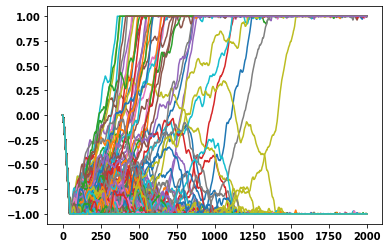

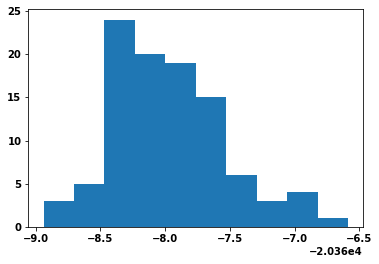

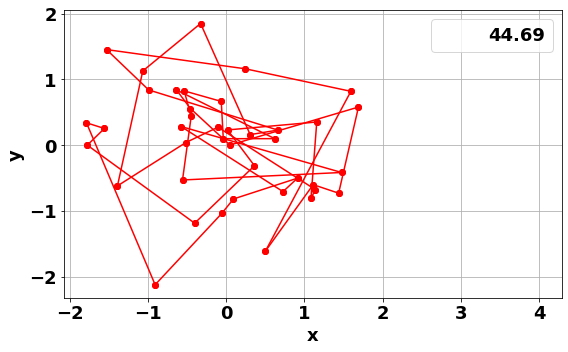

In [2]:
# define number of cities
N_cities = 40
# random generation of city coordinates and their lengths
cities,lengths = generate_cities(N_cities)


B = 0.1
A = 1.5*B*lengths.max()
J,h = get_Jh(lengths, A, B)
J = J.to(device)
h = h.to(device)

# ['gaussian_process', 'neural_net', 'differential_evolution', 'nelder_mead', 'random']
controller_type = 'neural_net'
simcim = Simcim(J, h, device, datatype)
simcim.params_disc['attempt_num'] = 100
simcim.params_cont['O'] = 0.1
simcim.params_cont['S'] = 0.2
simcim.params_cont['D'] = -0.
simcim.params_cont['sigma'] = 1.
simcim.params_cont['dt'] = 0.1
params_opt = main(controller_type,simcim)
c_current, c_evol = simcim.evolve(params_opt)

for i in range(c_evol.shape[0]):
    plt.plot(c_evol[i].cpu().numpy())
plt.show()
s_cur = torch.sign(c_current)
E = energy(J,h,s_cur)
plt.hist(E.cpu().numpy())
plt.show()

s_min = s_cur[:,torch.argmin(E)]
order = get_order_simcim(s_min,N_cities)

fig = plot_cities(cities,lengths,order.cpu().numpy())

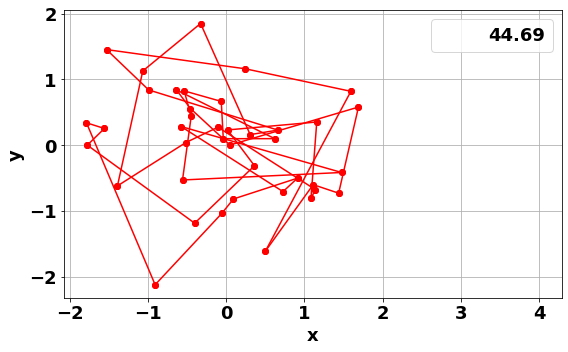

In [4]:
simcim.params_disc['attempt_num'] = 1000
c_current, c_evol = simcim.evolve(params_opt)

s_min = s_cur[:,torch.argmin(E)]
order = get_order_simcim(s_min,N_cities)

fig = plot_cities(cities,lengths,order.cpu().numpy())